In [1]:
import pandas as pd
import numpy as np
from bqplot import pyplot as plt

In [2]:
# import data
# training data, data in some columns (2,4) is mix-typed so use unicode
# explicitly assign types to columns
t_df = pd.read_csv('source_data/train.csv', index_col=[0], dtype={
    'Housing Situation': 'unicode',
    'Work Experience in Current Job [years]': 'unicode'
})
t_df.head()

/Users/cary/.local/share/virtualenvs/cs7cs4-group-comp-PCvzJ4oH/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year of Record,Housing Situation,Crime Level in the City of Employement,Work Experience in Current Job [years],Satisfation with employer,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Yearly Income in addition to Salary (e.g. Rental Income),Total Yearly Income [EUR]
Instance,,,,,,,,,,,,,,,,
1,1940.0,0,33,17,Unhappy,other,45,Afghanistan,25179,group head,No,1,Black,182,0 EUR,6182.05
2,1940.0,0,25,4.9,Unhappy,female,17,Afghanistan,2278204,heavy vehicle and mobile equipment service tec...,No,0,Blond,172,0 EUR,6819.69
3,1940.0,0,34,21,Unhappy,female,48,Afghanistan,822134,sorter,Bachelor,0,Blond,144,0 EUR,8663.53
4,1940.0,0,70,18,Average,female,42,Albania,59477,quality control senior engineer,No,1,Brown,152,0 EUR,2400.64
5,1940.0,0,51,8,Happy,other,15,Albania,23494,logistician,Master,1,Black,180,0 EUR,2816.18


In [3]:
t_row, t_col = t_df.shape

In [4]:
# see N/A values
t_df.shape[0] - t_df.count()

Year of Record                                               4013
Housing Situation                                               0
Crime Level in the City of Employement                          0
Work Experience in Current Job [years]                          0
Satisfation with employer                                   38087
Gender                                                      74127
Age                                                             0
Country                                                         0
Size of City                                                    0
Profession                                                   2853
University Degree                                           80600
Wears Glasses                                                   0
Hair Color                                                  70211
Body Height [cm]                                                0
Yearly Income in addition to Salary (e.g. Rental Income)        0
Total Year

In [5]:
# training data preprocessing

# np.around Total Yearly Income [EUR]
t_df['Total Yearly Income [EUR]'] = t_df['Total Yearly Income [EUR]'].map(lambda i: np.around(i))

# drop duplicates
t_df = t_df.drop_duplicates()

# drop (t_df['Year of Record'] < 2000) & (t_df['Total Yearly Income [EUR]'] > 400000)
t_df.drop(t_df[(t_df['Year of Record'] < 2000) & (t_df['Total Yearly Income [EUR]'] > 400000)].index)



,Year of Record,Housing Situation,Crime Level in the City of Employement,Work Experience in Current Job [years],Satisfation with employer,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Yearly Income in addition to Salary (e.g. Rental Income),Total Yearly Income [EUR]
Instance,,,,,,,,,,,,,,,,
1,1940.0,0,33,17,Unhappy,other,45,Afghanistan,25179,group head,No,1,Black,182,0 EUR,6182.0
2,1940.0,0,25,4.9,Unhappy,female,17,Afghanistan,2278204,heavy vehicle and mobile equipment service tec...,No,0,Blond,172,0 EUR,6820.0
3,1940.0,0,34,21,Unhappy,female,48,Afghanistan,822134,sorter,Bachelor,0,Blond,144,0 EUR,8664.0
4,1940.0,0,70,18,Average,female,42,Albania,59477,quality control senior engineer,No,1,Brown,152,0 EUR,2401.0
5,1940.0,0,51,8,Happy,other,15,Albania,23494,logistician,Master,1,Black,180,0 EUR,2816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991330,NaN,nA,162,18,Somewhat Happy,NaN,48,United Arab Emirates,1182162,it - project manager,Master,0,NaN,172,0 EUR,3826.0
991331,NaN,Medium Apartment,125,11,Happy,NaN,20,United Arab Emirates,46984,police officer,PhD,1,Blond,194,0 EUR,370817.0
991332,NaN,Small House,161,23,Average,NaN,47,United Arab Emirates,46067,NaN,Bachelor,1,Blond,196,0 EUR,45295.0


In [6]:
# Year of Record

# rid of N/A columns 4013 / 104857
t_df.dropna(subset = ['Year of Record'])

# count
t_df['Year of Record'].value_counts().sort_index()

1940.0    11237
1941.0    11196
1942.0    11193
1943.0    11260
1944.0    11136
          ...  
2015.0    11199
2016.0    11315
2017.0    11209
2018.0    11090
2019.0    11387
Name: Year of Record, Length: 80, dtype: int64

In [7]:
# use 1% sample to plot
# t_df.sample(frac = 0.01, random_state = None).plot.scatter(x='Year of Record', y = 'Total Yearly Income [EUR]')

In [8]:
# devide into 2 columns according to the 1990 boundary
t_df['Year of Record B1990'] = t_df['Year of Record'].map(lambda y: y if y <= 1990 else 0)
t_df['Year of Record A1990'] = t_df['Year of Record'].map(lambda y: y if y > 1990 else 0)

t_df.head()

,Year of Record,Housing Situation,Crime Level in the City of Employement,Work Experience in Current Job [years],Satisfation with employer,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Yearly Income in addition to Salary (e.g. Rental Income),Total Yearly Income [EUR],Year of Record B1990,Year of Record A1990
Instance,,,,,,,,,,,,,,,,,,
1,1940.0,0,33,17,Unhappy,other,45,Afghanistan,25179,group head,No,1,Black,182,0 EUR,6182.0,1940.0,0.0
2,1940.0,0,25,4.9,Unhappy,female,17,Afghanistan,2278204,heavy vehicle and mobile equipment service tec...,No,0,Blond,172,0 EUR,6820.0,1940.0,0.0
3,1940.0,0,34,21,Unhappy,female,48,Afghanistan,822134,sorter,Bachelor,0,Blond,144,0 EUR,8664.0,1940.0,0.0
4,1940.0,0,70,18,Average,female,42,Albania,59477,quality control senior engineer,No,1,Brown,152,0 EUR,2401.0,1940.0,0.0
5,1940.0,0,51,8,Happy,other,15,Albania,23494,logistician,Master,1,Black,180,0 EUR,2816.0,1940.0,0.0


In [9]:
# Housing Situation

# count
t_df['Housing Situation'].value_counts().sort_index()

0                   129657
Castle              112986
Large Apartment     113226
Large House         112901
Medium Apartment     89282
Medium House        113111
Small Apartment       6893
Small House         113386
nA                  112577
Name: Housing Situation, dtype: int64

In [10]:
# Housing Situation one hot encoding

dummies = pd.get_dummies(t_df['Housing Situation'], prefix = 'HS')

t_df.drop('Housing Situation', axis = 1, inplace = True)
t_df = t_df.join(dummies)

t_df.head()

,Year of Record,Crime Level in the City of Employement,Work Experience in Current Job [years],Satisfation with employer,Gender,Age,Country,Size of City,Profession,University Degree,...,Year of Record A1990,HS_0,HS_Castle,HS_Large Apartment,HS_Large House,HS_Medium Apartment,HS_Medium House,HS_Small Apartment,HS_Small House,HS_nA
Instance,,,,,,,,,,,,,,,,,,,,,
1,1940.0,33,17,Unhappy,other,45,Afghanistan,25179,group head,No,...,0.0,1,0,0,0,0,0,0,0,0
2,1940.0,25,4.9,Unhappy,female,17,Afghanistan,2278204,heavy vehicle and mobile equipment service tec...,No,...,0.0,1,0,0,0,0,0,0,0,0
3,1940.0,34,21,Unhappy,female,48,Afghanistan,822134,sorter,Bachelor,...,0.0,1,0,0,0,0,0,0,0,0
4,1940.0,70,18,Average,female,42,Albania,59477,quality control senior engineer,No,...,0.0,1,0,0,0,0,0,0,0,0
5,1940.0,51,8,Happy,other,15,Albania,23494,logistician,Master,...,0.0,1,0,0,0,0,0,0,0,0


In [11]:
# Crime Level in the City of Employement

# count
t_df['Crime Level in the City of Employement'].value_counts().sort_index()

0      29839
4       6141
5      15003
6       8596
7         78
       ...  
200        2
201        3
202        1
203        2
206        1
Name: Crime Level in the City of Employement, Length: 202, dtype: int64

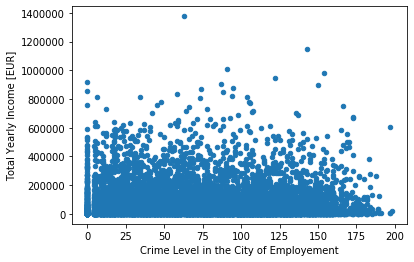

In [13]:
t_df.sample(frac = 0.01, random_state = None).plot.scatter(x='Crime Level in the City of Employement', y = 'Total Yearly Income [EUR]')